In [93]:
import numpy as np 
import matplotlib.pyplot as  plt 
import pandas as pd  
import seaborn as sns 

In [94]:
pd.set_option("display.max_row",300)
pd.set_option("display.max_column",300)  

In [95]:
data = pd.read_csv("car data.csv")

In [96]:
data.shape

(301, 9)

In [97]:
df = data.copy()

# Analyse superficielle

In [98]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [99]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [100]:
df.dtypes.value_counts()

object     4
int64      3
float64    2
Name: count, dtype: int64

<Axes: ylabel='count'>

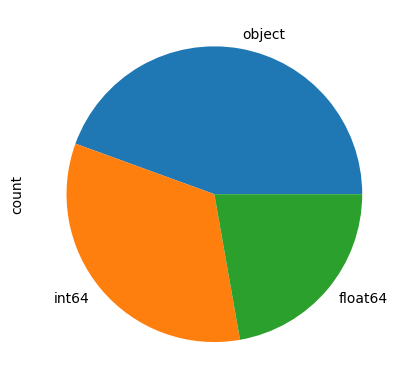

In [101]:
df.dtypes.value_counts().plot.pie()

In [102]:
df.isna() 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [103]:
#Voir le pourcentage de données manquantes dans notre dataset 

(df.isna().sum()/df.shape[0]).sort_values(ascending=True) 
#Aucun nan

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

# Analyse de fond

### Relation target/Variables

In [104]:
X = df.drop("Selling_Price",axis = 1)
y = df['Selling_Price'] 

In [105]:
X

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,city,2016,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,12.50,9000,Diesel,Dealer,Manual,0


In [106]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [107]:
X.dtypes.value_counts()

object     4
int64      3
float64    1
Name: count, dtype: int64

Text(0.5, 1.0, 'Correlation between numerical_variables')

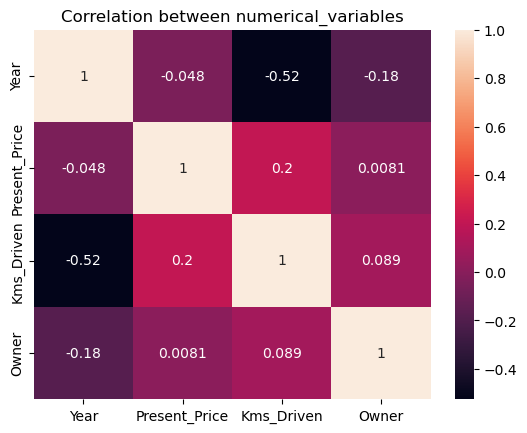

In [108]:
numeric = X.select_dtypes(include=['int64',"float64"])

sns.heatmap(numeric.corr(),annot=True)
plt.title("Correlation between numerical_variables")

In [109]:
numeric

,Year,Present_Price,Kms_Driven,Owner
0,2014,5.59,27000,0
1,2013,9.54,43000,0
2,2017,9.85,6900,0
3,2011,4.15,5200,0
4,2014,6.87,42450,0
...,...,...,...,...
296,2016,11.60,33988,0
297,2015,5.90,60000,0
298,2009,11.00,87934,0
299,2017,12.50,9000,0


In [110]:
non_numeric = X.select_dtypes(include=["object"])

from sklearn.preprocessing import OrdinalEncoder
 
labelenco =  OrdinalEncoder()

non_n_enco = labelenco.fit_transform(non_numeric) 

In [111]:
non_n_enco_df = pd.DataFrame(non_n_enco,columns=non_numeric.columns,
                             index=non_numeric.index) 

non_n_enco_df

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,90.0,2.0,0.0,1.0
1,93.0,1.0,0.0,1.0
2,68.0,2.0,0.0,1.0
3,96.0,2.0,0.0,1.0
4,92.0,1.0,0.0,1.0
...,...,...,...,...
296,69.0,1.0,0.0,1.0
297,66.0,2.0,0.0,1.0
298,69.0,2.0,0.0,1.0
299,69.0,1.0,0.0,1.0


Text(0.5, 1.0, 'Correlation between non_numerical variables')

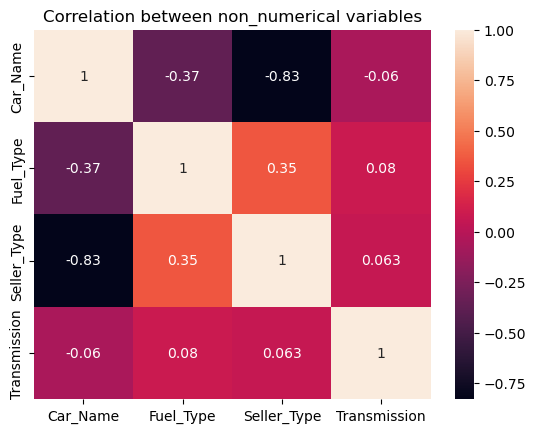

In [112]:
sns.heatmap(non_n_enco_df.corr(),annot=True)
plt.title("Correlation between non_numerical variables")

In [113]:
X_entier = pd.concat([numeric,non_n_enco_df],axis=1) 

X_entier

,Year,Present_Price,Kms_Driven,Owner,Car_Name,Fuel_Type,Seller_Type,Transmission
0,2014,5.59,27000,0,90.0,2.0,0.0,1.0
1,2013,9.54,43000,0,93.0,1.0,0.0,1.0
2,2017,9.85,6900,0,68.0,2.0,0.0,1.0
3,2011,4.15,5200,0,96.0,2.0,0.0,1.0
4,2014,6.87,42450,0,92.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,69.0,1.0,0.0,1.0
297,2015,5.90,60000,0,66.0,2.0,0.0,1.0
298,2009,11.00,87934,0,69.0,2.0,0.0,1.0
299,2017,12.50,9000,0,69.0,1.0,0.0,1.0


Text(0.5, 1.0, 'Correlation between all of x variables')

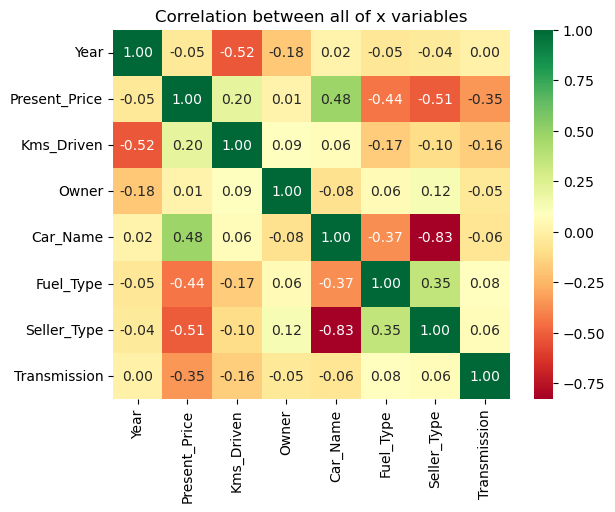

In [114]:
sns.heatmap(X_entier.corr(),annot=True,cmap='RdYlGn',fmt=".2f")
plt.title("Correlation between all of x variables")

In [115]:
corr = X_entier.join(y).corr()['Selling_Price'].drop("Selling_Price")
corr.sort_values(key=abs,ascending=False)

Present_Price    0.878983
Seller_Type     -0.550724
Fuel_Type       -0.509467
Car_Name         0.499198
Transmission    -0.367128
Year             0.236141
Owner           -0.088344
Kms_Driven       0.029187
Name: Selling_Price, dtype: float64

Text(0.5, 1.0, 'Correlation entre X et y')

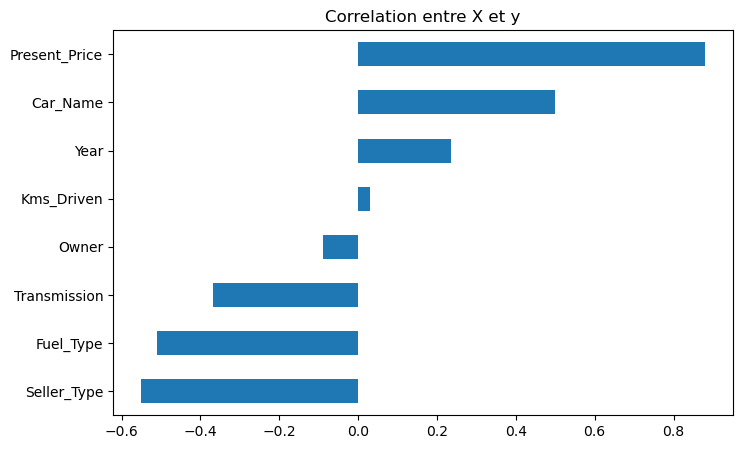

In [116]:
corr.sort_values().plot(kind="barh",figsize=(8,5))
plt.title("Correlation entre X et y")

Text(0.5, 1.0, 'Correlation des variables avec le Prix')

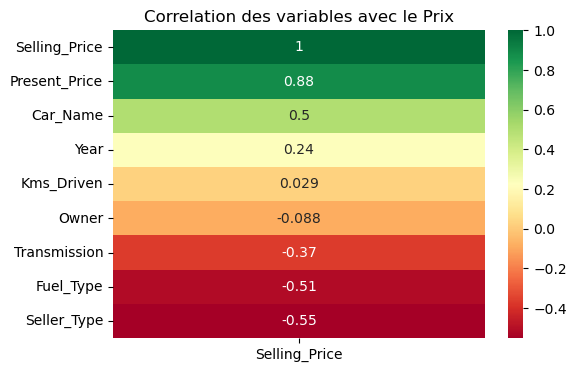

In [117]:
# 1. On crée un DataFrame qui contient X et y ensemble
df_final = pd.concat([X_entier, y], axis=1)

# 2. On calcule la corrélation et on ne garde que la colonne de 'y'
# On la trie pour que ce soit plus joli
corr_y = df_final.corr()[['Selling_Price']].sort_values(by='Selling_Price', ascending=False)

# 3. Affichage en Heatmap (une seule colonne)
plt.figure(figsize=(6,4))
sns.heatmap(corr_y, annot=True, cmap='RdYlGn', cbar=True)
plt.title("Correlation des variables avec le Prix")

In [ ]:
correlations = df_final.corr()['Selling_Price'].drop('Selling_Price')

# 2. Classer par valeur absolue (la force brute, peu importe le signe)
importance_classement = correlations.abs().sort_values(ascending=False)

print("Classement des Variables les plus influentes sur le prix :")

print()

print((importance_classement))


Classement des Variables les plus influentes sur le prix :

Present_Price    0.878983
Seller_Type      0.550724
Fuel_Type        0.509467
Car_Name         0.499198
Transmission     0.367128
Year             0.236141
Owner            0.088344
Kms_Driven       0.029187
Name: Selling_Price, dtype: float64


In [119]:
#1. On récupère les corrélations avec la cible en valeur absolue 

corr_series = df_final.corr()['Selling_Price'].drop('Selling_Price').abs().sort_values(ascending=False)

print(" CLASSEMENT DES VARIABLES PRÉDICTRICES ")
print()


for i, (col, val) in enumerate(corr_series.items(), 1):

    signe = "+" if df_final.corr().loc[col, 'Selling_Price'] > 0 else "-"
    
    print(f"{i}e : {col:<15}  {val:.2f} ({signe})")

 CLASSEMENT DES VARIABLES PRÉDICTRICES 

1e : Present_Price    0.88 (+)
2e : Seller_Type      0.55 (-)
3e : Fuel_Type        0.51 (-)
4e : Car_Name         0.50 (+)
5e : Transmission     0.37 (-)
6e : Year             0.24 (+)
7e : Owner            0.09 (-)
8e : Kms_Driven       0.03 (+)


Text(0.5, 1.0, 'Visualisation des Outliers')

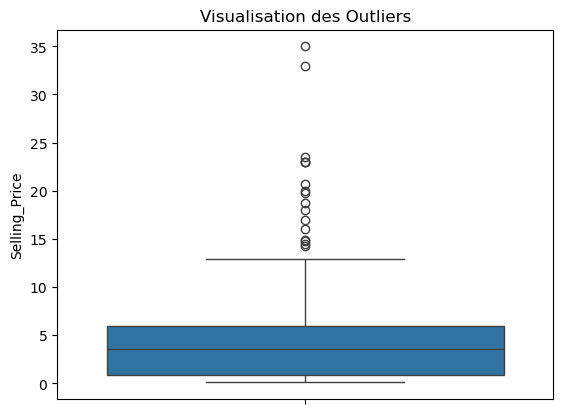

In [120]:
sns.boxplot(y)
plt.title("Visualisation des Outliers")

In [121]:
y_log = np.log1p(y) 

# Preprocessing


Text(0.5, 1.0, 'Distribution de y après gestion des outliers')

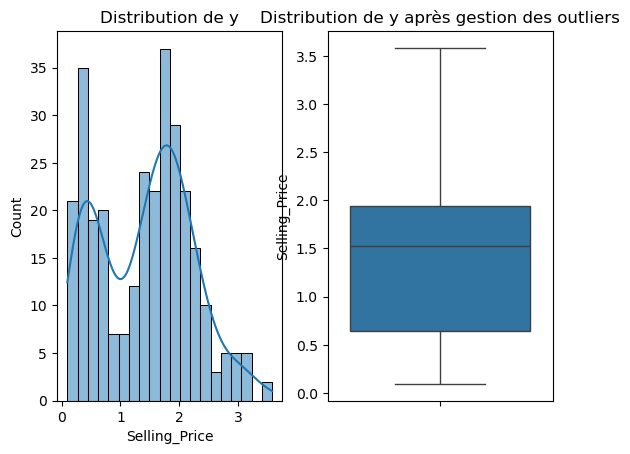

In [122]:
plt.subplot(1,2,1)
sns.histplot(y_log,bins=20,kde=True)
plt.title("Distribution de y") 

plt.subplot(1,2,2)
sns.boxplot(y_log)
plt.title("Distribution de y après gestion des outliers")

In [123]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import RobustScaler 
from sklearn.feature_selection import SelectKBest,f_regression


from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer 

#Importation des différents transformers à appliquer au dataset pour le preprocessing

In [124]:
numerical_features = make_column_selector(dtype_include=np.number)
non_numerical_features = make_column_selector(dtype_exclude=np.number)   

numerical_features = numerical_features(X)
non_numerical_features = non_numerical_features(X)

In [125]:
print("Numerical Variables:",numerical_features)
print("Non numerical Variables:",non_numerical_features)

Numerical Variables: ['Year', 'Present_Price', 'Kms_Driven', 'Owner']
Non numerical Variables: ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']


In [126]:
#Création d'un pipeline qui va contenir tous les transformers à appliqués à chaque catégorie de variable

numerical_pipeline = make_pipeline(PolynomialFeatures(2),RobustScaler())
                                   

non_numerical_pipeline = make_pipeline(OneHotEncoder(sparse_output=False,handle_unknown='ignore'),        
                                       PolynomialFeatures(2),RobustScaler() )

In [127]:
preprocessor = make_column_transformer((numerical_pipeline,numerical_features),
                                       (non_numerical_pipeline,non_numerical_features))

#Pour associer chaque catégorie de variables aux preprocessings dont il a besoin

In [128]:
preprocessor

,transformers,"[('pipeline-1', ...), ('pipeline-2', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,degree,2
,interaction_only,False
,include_bias,True


# Développement du modèle 

In [129]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y_log,test_size=0.2,random_state=42)

In [130]:
X_train_lavé = preprocessor.fit_transform(X_train,y_train) 

In [131]:
X_test_lavé = preprocessor.transform(X_test)   

In [132]:
from sklearn.ensemble import RandomForestRegressor

In [133]:
model = RandomForestRegressor()
model.fit(X_train_lavé,y_train) 

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [134]:
model.score(X_test_lavé,y_test)

0.966836574507586

In [135]:
y_pred = model.predict(X_test_lavé)

In [136]:
#Pour ramener les données à leur échelle normale 

y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred)


In [137]:
print(y_pred[:5])
print()     
print(y_test[0:5])

[0.34096855 2.40337355 1.77984382 0.1980961  2.1366572 ]

177    0.300105
289    2.407846
228    1.783391
198    0.139762
60     2.073172
Name: Selling_Price, dtype: float64


In [138]:
print(y_pred_real[:5])
print(y_test_real[:5])

[ 0.40630901 10.06042638  4.92893035  0.21907954  7.47107316]
177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
Name: Selling_Price, dtype: float64


## Evaluation de la performance du modèle


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score 

In [140]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE :", rmse)
print("R²   :", r2)


MAE : 0.10053659680305041
RMSE : 0.14230527533114604
R²   : 0.966836574507586


In [142]:
X.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0


## Pour de prochaines prédictions 

In [143]:
X_train.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [144]:
new_data = pd.DataFrame({
    "Car_Name": ["swift"],
    "Year": [2016],
    "Present_Price": [6.5],
    "Kms_Driven": ["35000"],
    "Fuel_Type": ["Petrol"],
    "Seller_Type": ["Dealer"], 
    "Transmission": ["Manual"],
    "Owner": [0]
})

In [145]:
new_data_lavé = preprocessor.transform(new_data)

In [146]:
new_predictions = model.predict(new_data_lavé) 

prediction_n = np.expm1(new_predictions)

print(new_predictions) 
print("prediction à l'échelle normale", prediction_n)

[1.72750351]
prediction à l'échelle normale [4.62658961]
